# Homework 01

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#Reading the csv file and dropping the feature instant which is unnecessary as its only a serial number.
mydata = pd.read_csv('hour.csv')
mydata = mydata.drop('instant',axis = 1)
mydata

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
z = mydata.drop(['dteday'],axis = 1)
a = z-z.mean()
b = a.T@a
c = b/17379
Std_z = z.std()
d = np.multiply.outer(Std_z.to_numpy(),Std_z.to_numpy())
correlation_matrix = c/d
correlation_matrix
#sns.heatmap(e)
#correlation_matrix = mydata.corr()
#correlation_matrix
#This gives us the autocorrelation matrix. It tells us how each feature is related to the other.

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,0.999942,-0.010742,0.830338,-0.006117,-0.009584,-0.002335,0.013742,-0.014523,0.312007,0.319361,0.150616,-0.149764,0.120200,0.174216,0.178045
yr,-0.010742,0.999942,-0.010472,-0.003867,0.006691,-0.004485,-0.002196,-0.019156,0.040911,0.039219,-0.083542,-0.008739,0.142770,0.253670,0.250480
mnth,0.830338,-0.010472,0.999942,-0.005772,0.018429,0.010399,-0.003477,0.005399,0.201680,0.208084,0.164402,-0.135379,0.068453,0.122266,0.120631
hr,-0.006117,-0.003867,-0.005772,0.999942,0.000479,-0.003498,0.002285,-0.020201,0.137596,0.133742,-0.276482,0.137244,0.301184,0.374119,0.394049
holiday,-0.009584,0.006691,0.018429,0.000479,0.999942,-0.102082,-0.252457,-0.017035,-0.027339,-0.030971,-0.010588,0.003987,0.031562,-0.047343,-0.030926
weekday,-0.002335,-0.004485,0.010399,-0.003498,-0.102082,0.999942,0.035953,0.003311,-0.001795,-0.008820,-0.037156,0.011501,0.032720,0.021577,0.026898
workingday,0.013742,-0.002196,-0.003477,0.002285,-0.252457,0.035953,0.999942,0.044670,0.055387,0.054664,0.015687,-0.011829,-0.300925,0.134318,0.030283
weathersit,-0.014523,-0.019156,0.005399,-0.020201,-0.017035,0.003311,0.044670,0.999942,-0.102634,-0.105557,0.418106,0.026224,-0.152619,-0.120959,-0.142418
temp,0.312007,0.040911,0.201680,0.137596,-0.027339,-0.001795,0.055387,-0.102634,0.999942,0.987615,-0.069877,-0.023124,0.459589,0.335342,0.404749
atemp,0.319361,0.039219,0.208084,0.133742,-0.030971,-0.008820,0.054664,-0.105557,0.987615,0.999942,-0.051915,-0.062332,0.454054,0.332539,0.400906


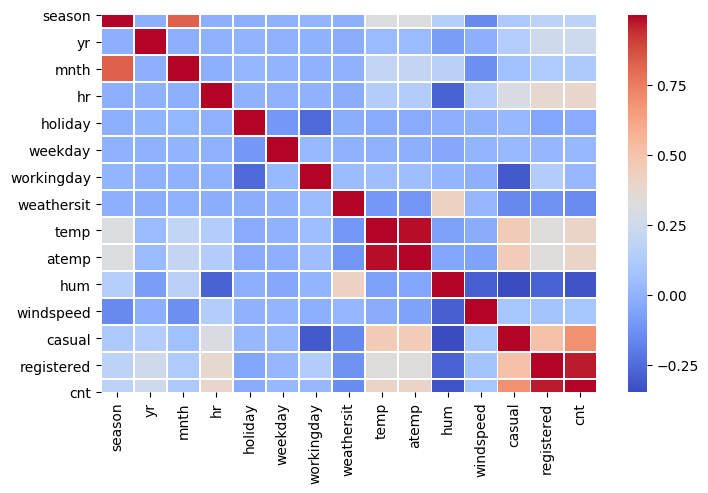

In [9]:
figure = plt.figure(figsize = (8,5),dpi = 100)
sns.heatmap(correlation_matrix, linewidths=.5,cmap = 'coolwarm')


### Exploratory Analysis

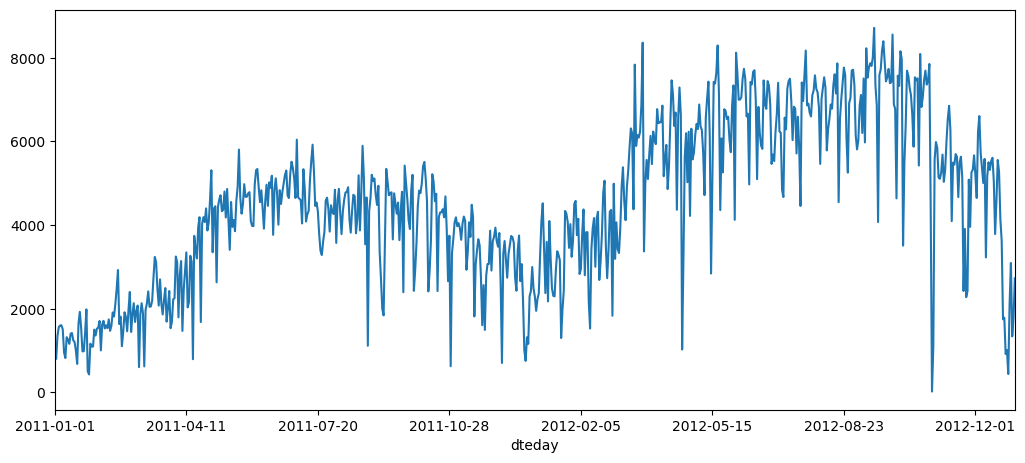

In [162]:
#Date VS Cnt
#Here i have grouped the counts per date's such that all the bicycles on 2011-01-01 have been summed up and printed.
fig = plt.figure(figsize = (12,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('dteday').sum()['cnt'].plot()

#Observation: I feel the per day data is very non informative and doesnt give us a trend to predict the cnt

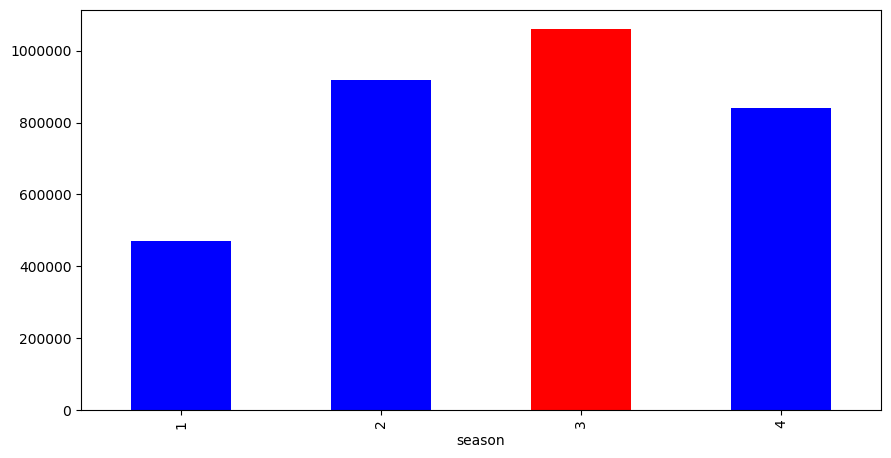

In [103]:
#Season VS Cnt
#Here i have grouped the seasons  such that all the bicycles in spring have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('season').sum()['cnt'].plot(kind = 'bar', color = ['b','b','r','b'])

#Observation: We can tell that the count is highest in the fall season and least in spring season
#We can also drop this feature as it  is highly correlated with month feature which basically tells us the same information.

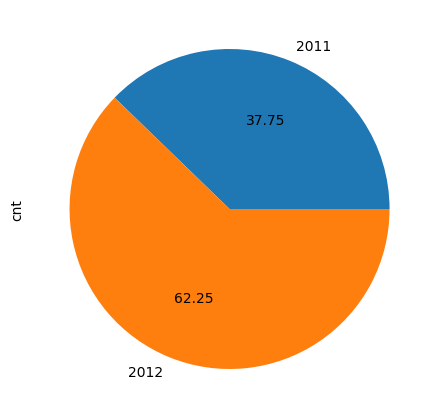

In [100]:
#Year VS Cnt
#Here i have grouped the Years  such that all the bicycles in 2011 have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('yr').sum()['cnt'].plot(kind = 'pie',labels=['2011','2012'],autopct='%.2f')

#Observation: We can tell that the count is highest in the 2012 year and least in 2011

Text(0.5, 0, 'MONTH')

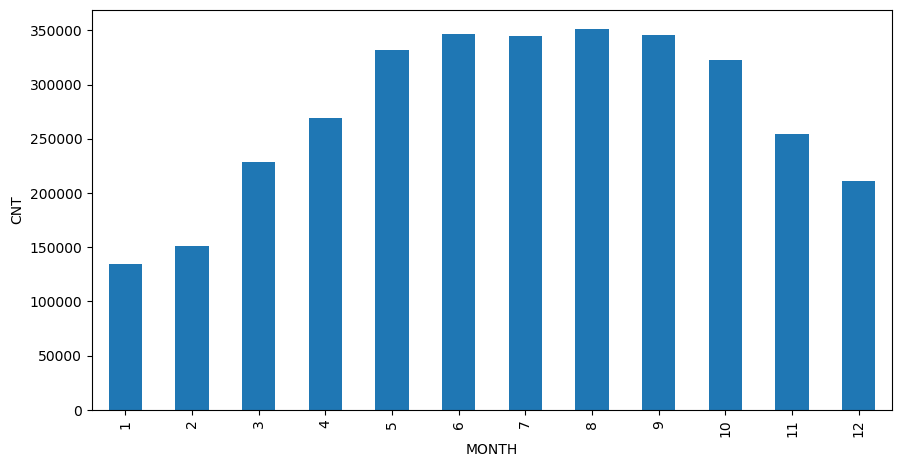

In [108]:
#Month VS Cnt
#Here i have grouped the Months such that all the bicycles in december have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('mnth').sum()['cnt'].plot.bar()
axes.set_ylabel('CNT')
axes.set_xlabel('MONTH')
#Observation: We can tell that the count is highest in months of june july august sept and decreses in jan feb nov december when the weather is relatively cold.

Text(0.5, 0, 'HOUR')

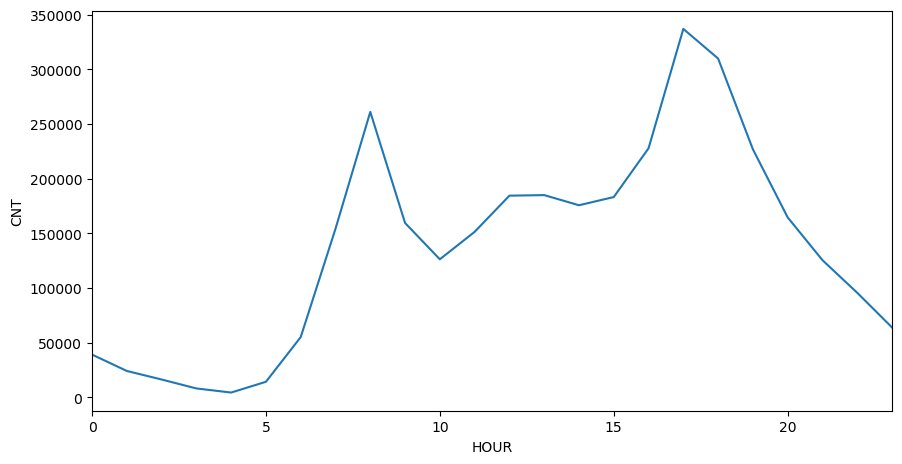

In [163]:
#Hour VS Cnt
#Here i have grouped the hours in every month such that all the bicycles in the 1st hour have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
mydata.groupby('hr').sum()['cnt'].plot.line()
axes.set_ylabel('CNT')
axes.set_xlabel('HOUR')
#Observation: We can tell that the count is highest in the hours of 9am which is probably due to school and office start and during the noon time when people leave work.

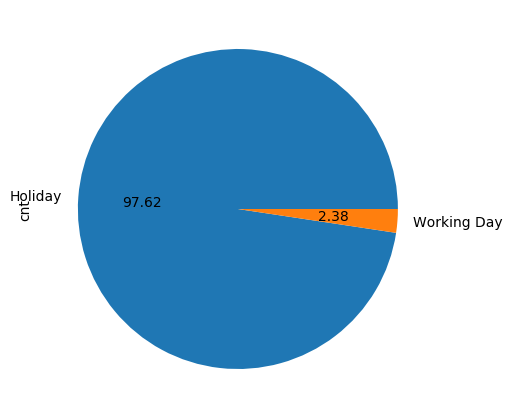

In [120]:
#Holiday VS Cnt
#Here i have grouped the holidays such that all the bicycles rented on holidsays have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('holiday').sum()['cnt'].plot(kind = 'pie',labels = ['Holiday','Working Day'], autopct = '%.2f')
#Observation: We can tell that the count is highest on holidays and very less on working days.

Text(0, 0.5, 'COUNT')

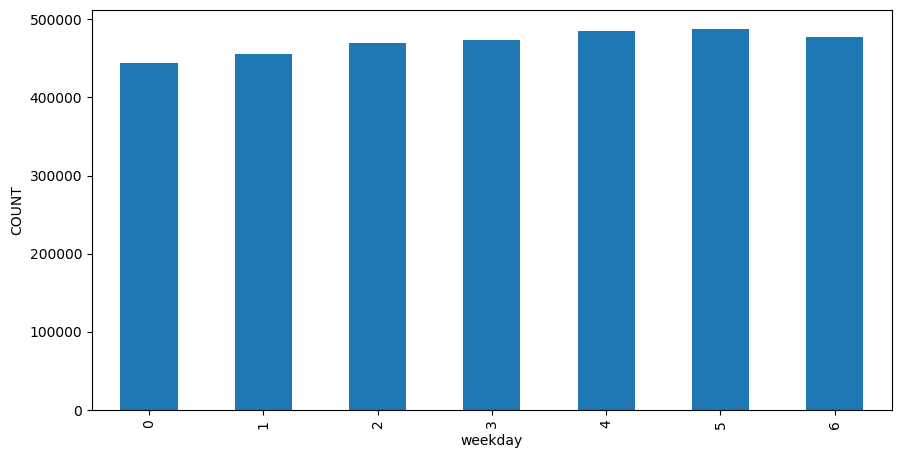

In [124]:
#Weekday VS Cnt
#Here i have grouped the weekdays such that all the bicycles on sat sun friday have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('weekday').sum()['cnt'].plot(kind = 'bar')
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is pretty similar on all days.

Text(0, 0.5, 'COUNT')

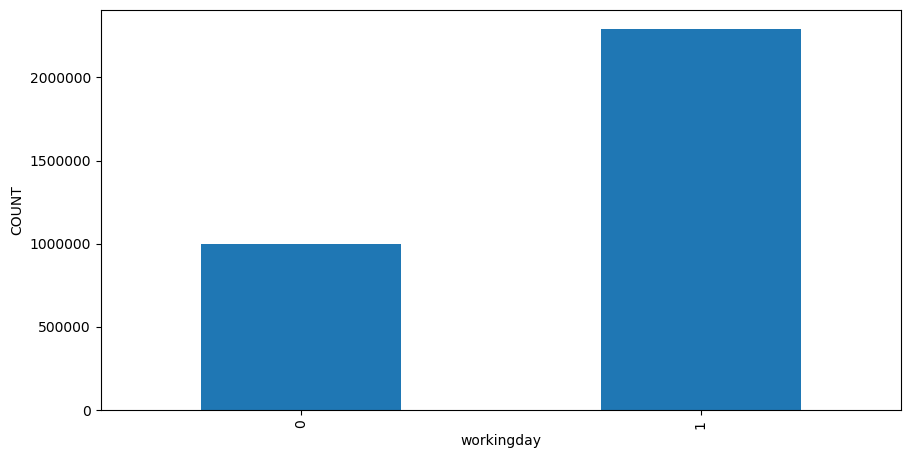

In [126]:
#Working day VS Cnt
#Here i have grouped the workingdays such that all the bicycles on non holidays have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('workingday').sum()['cnt'].plot(kind = 'bar')
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is very high on non holidays.

Text(0, 0.5, 'COUNT')

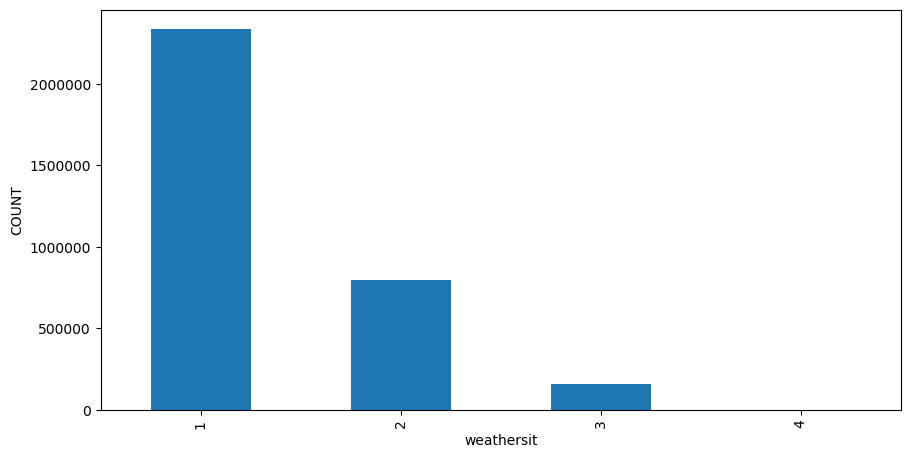

In [127]:
#Weather VS Cnt
#Here i have grouped the weathers such that all the bicycles on fall..summer etc have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('weathersit').sum()['cnt'].plot(kind = 'bar')
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is very high on clear sky days while very less on rainy days 

Text(0, 0.5, 'COUNT')

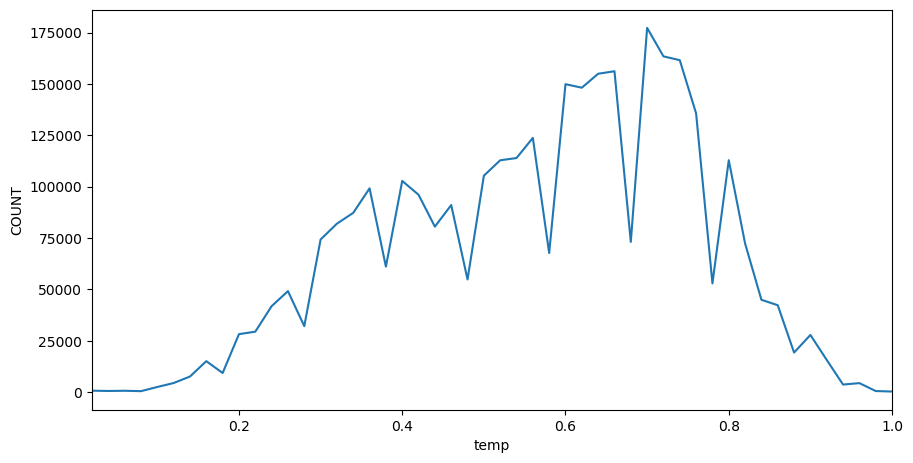

In [130]:
#Temp VS Cnt
#Here i have grouped the temperature such that all the bicycles on days with a certain temp have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('temp').sum()['cnt'].plot(kind = 'line')
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is very high on days with moderate temp and less on very hot and very cold days.

Text(0, 0.5, 'COUNT')

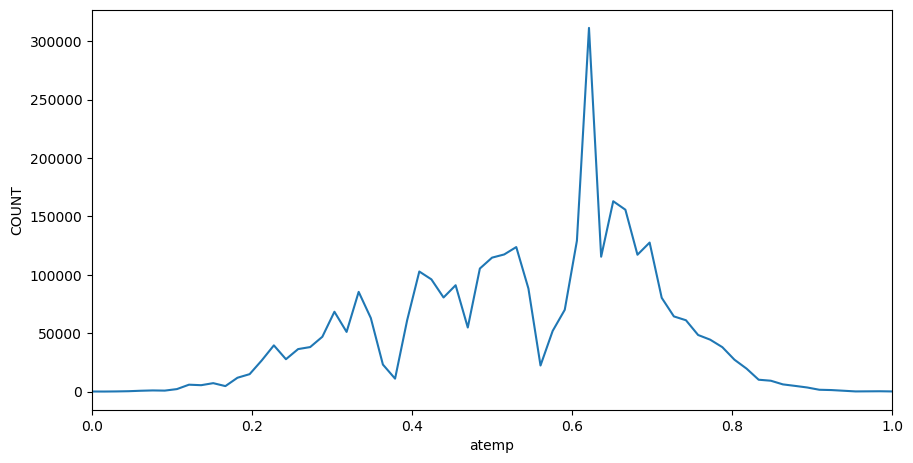

In [131]:
#Atemp VS Cnt
#Here i have grouped temperature such that all the bicycles on days with a certain temp have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('atemp').sum()['cnt'].plot(kind = 'line')
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is very high on days with moderate feeling temp and less on very hot and very cold days.

Text(0, 0.5, 'COUNT')

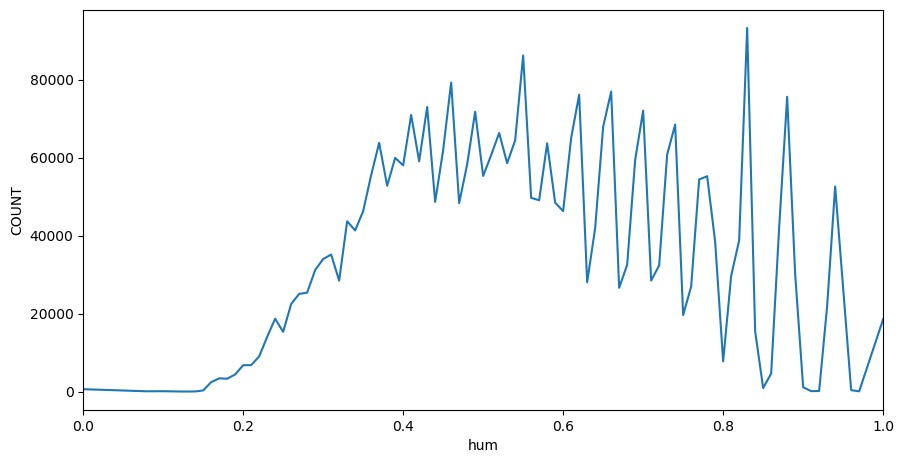

In [142]:
#Humidity VS Cnt
#Here i have grouped the humidity such that all the bicycles on days with xyz humidity have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('hum').sum()['cnt'].plot()
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is  high on days with moderate humidity and less on very hot days.

Text(0, 0.5, 'COUNT')

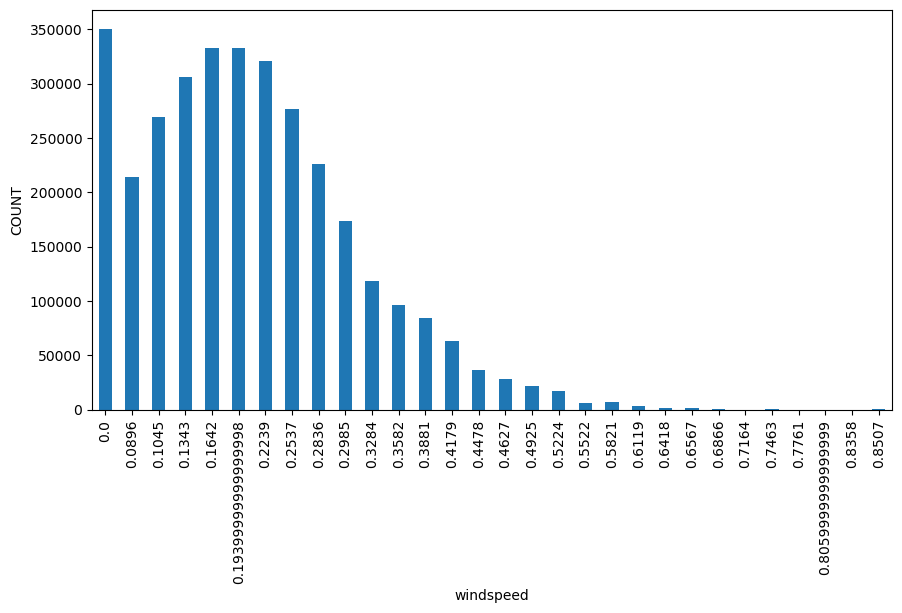

In [144]:
#Windspeed VS Cnt
#Here i have grouped the windy day usage such that all the bicycles on windy days have been summed up and plotted.
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
mydata.groupby('windspeed').sum()['cnt'].plot.bar()
axes.set_ylabel('COUNT')
#Observation: We can tell that the count is  high on days with moderate to less speeds and less on very windy days.

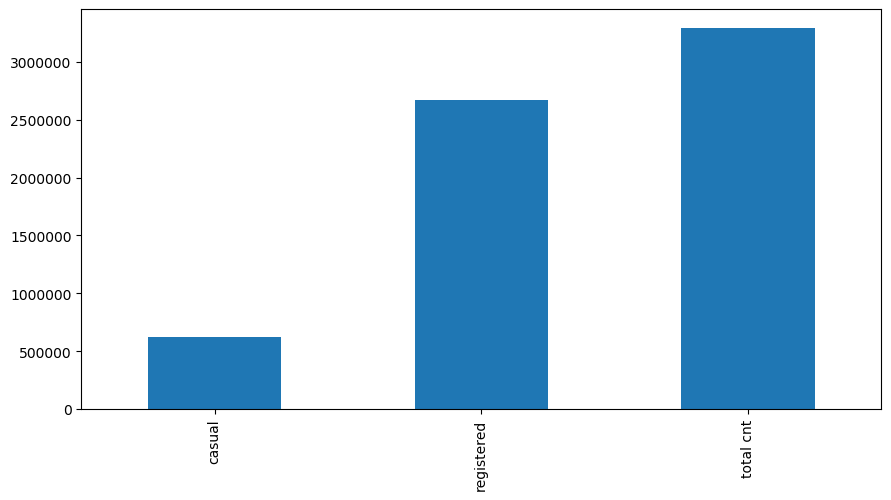

In [207]:
#Casual users and Registered users VS Cnt
#Here i have summed up the total casual users and the total registered users and plotted them against the count
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])

temp = pd.DataFrame([620017,2672662,3292679],['casual','registered','total cnt'],['number'])
temp['number'].plot(kind = 'bar')

#Observation: I summed up the total casual users and total registered users and we plotted it against the total cnt, we observe that we dont need both the features as theu are complimentary of each other and the data over fits if we use both.. hence i dropped casual users as registered has more points.

### Preprocessing

After studying the exploratory graphs i feel the date information is redundant. As we can see from the graph, there isnt any clear correlation between count and date.

Another field that i feel is redundant is weekday. We notice that the cnts for each day of the week is almost the same and hence it doesnt give us any useful information. We can transform this feature into weekend and weekday and observe if friday/sat/sunday affects the cnt of bikes 

Also the normalised feeling temperature doesnt give us any extra information that the other temperature field hasnt already. Hence it might be redundant to our use.

We can change date feature to week feature if we wanted to.

### Model Representation and Estimation

In [347]:
#Removing all the unnecesary features that do not help in predicting anything.

t = mydata['cnt']
cleaned_mydata = mydata.drop(['dteday','atemp','weekday','cnt','casual','season'],axis = 1)
cleaned_mydata

,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,registered
0,0,1,0,0,0,1,0.24,0.81,0.0000,13
1,0,1,1,0,0,1,0.22,0.80,0.0000,32
2,0,1,2,0,0,1,0.22,0.80,0.0000,27
3,0,1,3,0,0,1,0.24,0.75,0.0000,10
4,0,1,4,0,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,2,0.26,0.60,0.1642,108
17375,1,12,20,0,1,2,0.26,0.60,0.1642,81
17376,1,12,21,0,1,1,0.26,0.60,0.1642,83
17377,1,12,22,0,1,1,0.26,0.56,0.1343,48


In [348]:
#using scikit learn packages to split data randomly into sets of training and testign data.
from sklearn.model_selection import train_test_split
X_train,X_test,t_train,t_test = train_test_split(cleaned_mydata,t,test_size = 0.4,random_state =101)

#### MLE

In [349]:
w = list(np.linalg.inv(X_train.T@X_train)@X_train.T@t_train)
print(w)

[3.5920038155527605, 0.09864616210592048, 0.6868847030831613, -9.480136751071418, -37.11035515370783, 3.2361013895488355, 94.80308399578806, -37.47015279464495, 18.553916820560584, 1.1178614750555265]


Text(0.5, 1.0, 'True Vs Prediction')

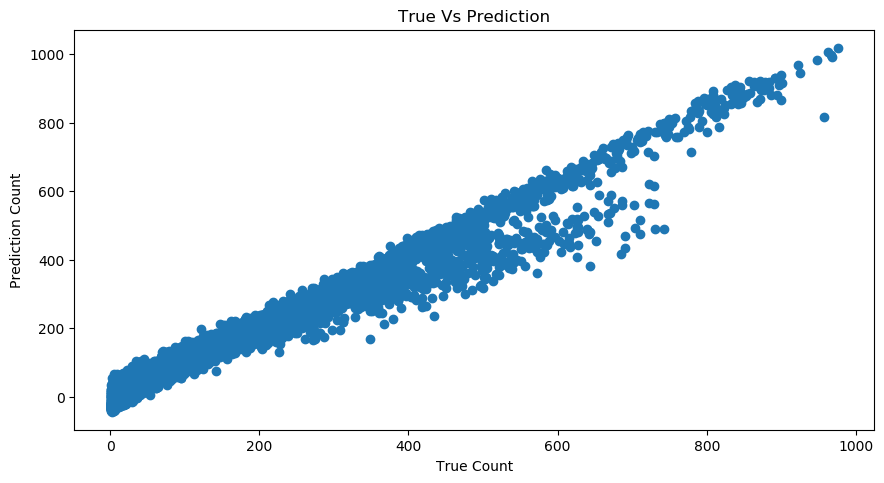

In [350]:
y = X_test@w
#X_test
fig = plt.figure(figsize = (10,5),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
axes.scatter(t_test,y)
axes.set_xlabel('True Count')
axes.set_ylabel('Prediction Count')
axes.set_title('True Vs Prediction')

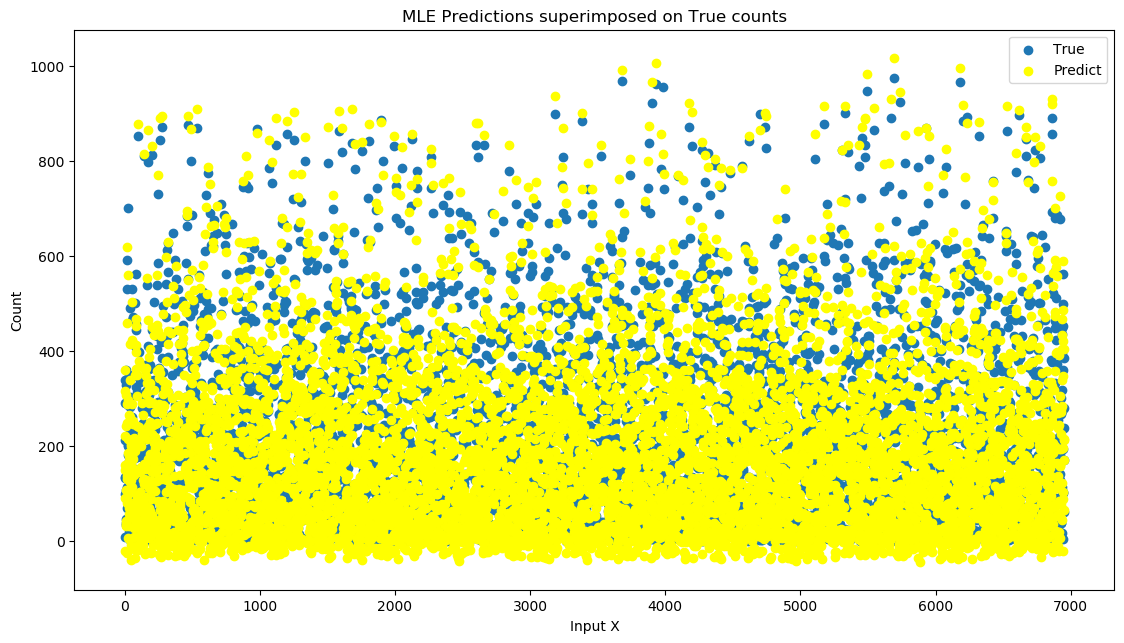

In [351]:
p = np.arange(0,6952,1)
fig = plt.figure(figsize = (13,7),dpi =100)
axes = fig.add_axes([1,0.1,0.8,0.8])
axes.scatter(p,t_test,label = 'True')
axes.scatter(p,y,color ='yellow',label='Predict')
axes.set_xlabel('Input X')
axes.set_ylabel('Count')
axes.set_title('MLE Predictions superimposed on True counts')
axes.legend()

#### MAP

In [353]:
def PolynomialRegression_Regularized(l):
    X = X_train
    w = list(np.linalg.inv(X_train.T@X_train + l*np.eye(10)).T@X_train.T@t_train)
    y = X_test@w
    print(w)
    eigvals, eigvecs = np.linalg.eig(X_test.T@X_test + l*np.eye(10))
    c = np.max(np.abs(eigvals))/np.min(np.abs(eigvals))
    return y,c

[3.5920038155522676, 0.09864616210590399, 0.6868847030831747, -9.480136751071448, -37.11035515370779, 3.2361013895486126, 94.8030839957867, -37.47015279464357, 18.55391682056033, 1.1178614750555274]
Condition Number = 2982817.3532334943


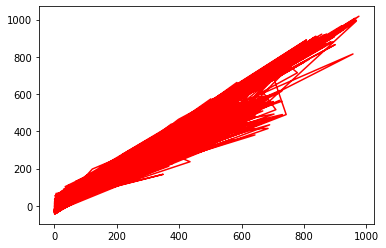

[3.6075763727687478, 0.11275471007097587, 0.703757496228371, -9.036756558093076, -36.85313580448049, 3.039699761537025, 92.17685035549201, -35.88611239770134, 18.005778326942064, 1.1191490772020778]
Condition Number = 2732529.389211288


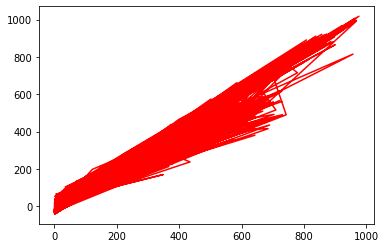

[3.6633870451506567, 0.16685320702408507, 0.7626484627753681, -7.532953319686207, -35.88165860639205, 2.3985160329453628, 83.0301191032984, -30.58964043919171, 16.09399311063592, 1.1235583847192279]
Condition Number = 2045858.2801715925


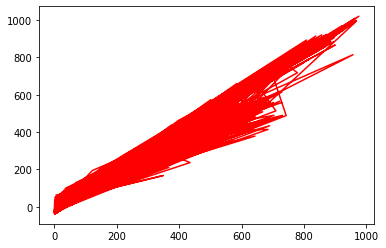

[3.7353229182456964, 0.2512328663905999, 0.8412318645023326, -5.642805501527078, -34.36748263348045, 1.64854841050981, 70.83926962064383, -24.097020199343675, 13.55521314441105, 1.129230434232674]
Condition Number = 1420965.6375298258


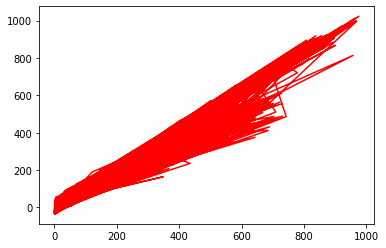

[3.753586047297405, 0.27816179352121084, 0.8638341029125932, -5.126179479485124, -33.874211774898484, 1.4544709130255944, 67.32672088909766, -22.353766690489138, 12.828506232332035, 1.1308153512663188]
Condition Number = 1281203.4160085043


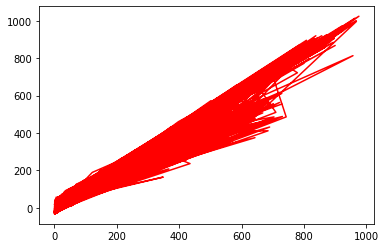

[3.759894101802973, 0.28848207915867863, 0.8722381223838322, -4.937349835602573, -33.68299776199147, 1.3846754277150057, 66.01900256584469, -21.71987484114213, 12.558685995836221, 1.1313992181774546]
Condition Number = 1232705.2399108405


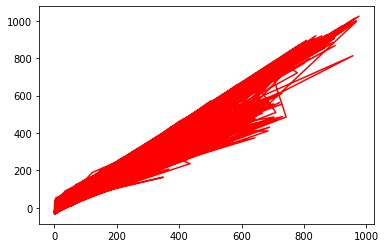

[3.770897007277836, 0.30837666909276645, 0.8880685735699982, -4.586577827510392, -33.3103387634988, 1.2565993901410573, 63.55243342301424, -20.546916842588978, 12.050945731712343, 1.1324909292898213]
Condition Number = 1145948.6577939538


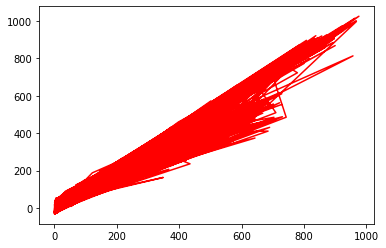

[3.7818056218201574, 0.33190207529511045, 0.9062060755330956, -4.192761201789534, -32.861691447232026, 1.1151556290253093, 60.71984278265312, -19.23691918526082, 11.469913254636332, 1.1337285868465201]
Condition Number = 1053287.0385865236


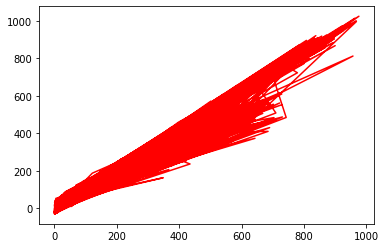

[3.783326954169282, 0.47622924511119336, 1.006656546465371, -2.178557435864309, -29.80917121620012, 0.4190296815824497, 44.78002799783681, -12.630510050755449, 8.249422915707532, 1.1403209839010695]
Condition Number = 639564.7427364199


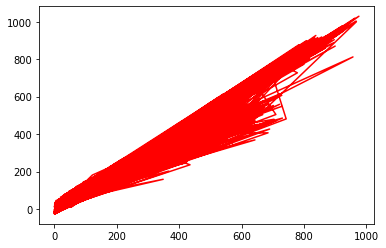

In [354]:
l = [0, 10,50,120,145,155,175,200,400]

for i in range(len(l)):
    y,c = PolynomialRegression_Regularized(l[i])
    print("Condition Number = "+str(c))

    plt.plot(t_test, y, 'r', label = 'Prediction')
    plt.show()

[3.5920038155522676, 0.09864616210590399, 0.6868847030831747, -9.480136751071448, -37.11035515370779, 3.2361013895486126, 94.8030839957867, -37.47015279464357, 18.55391682056033, 1.1178614750555274]
Condition Number = 2982817.3532334943
Absolute_Error 156340.74532808247 
Lamda_value 0 
R2_Score 0.9657434037223945 

[3.6075763727687478, 0.11275471007097587, 0.703757496228371, -9.036756558093076, -36.85313580448049, 3.039699761537025, 92.17685035549201, -35.88611239770134, 18.005778326942064, 1.1191490772020778]
Condition Number = 2732529.389211288
Absolute_Error 155864.6501554687 
Lamda_value 10 
R2_Score 0.9657238055921746 

[3.6633870451506567, 0.16685320702408507, 0.7626484627753681, -7.532953319686207, -35.88165860639205, 2.3985160329453628, 83.0301191032984, -30.58964043919171, 16.09399311063592, 1.1235583847192279]
Condition Number = 2045858.2801715925
Absolute_Error 154618.23000265742 
Lamda_value 50 
R2_Score 0.9655083023374834 

[3.7353229182456964, 0.2512328663905999, 0.841231

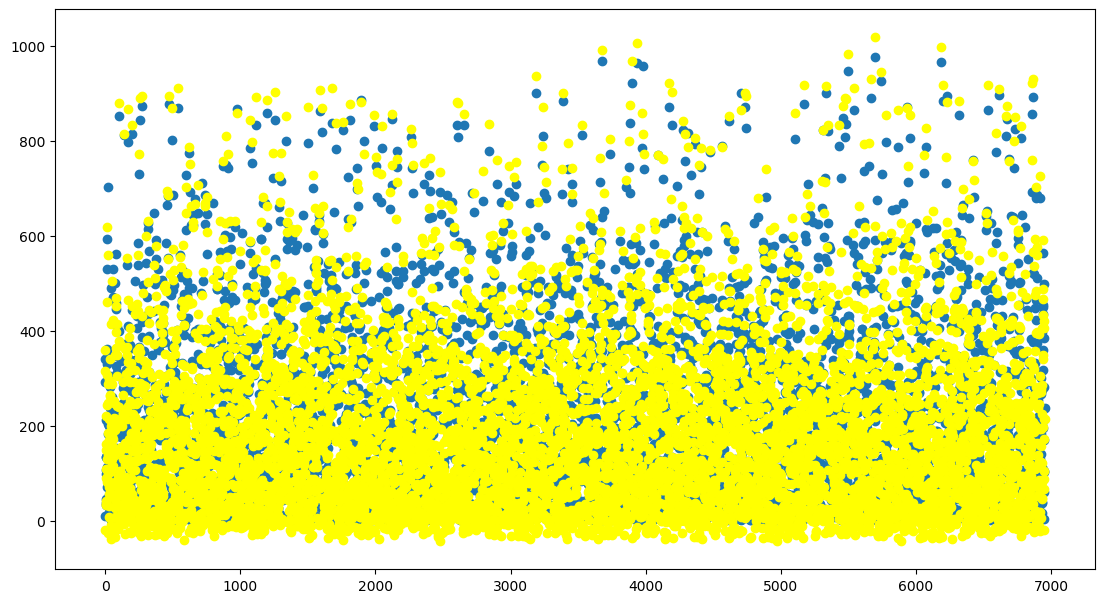

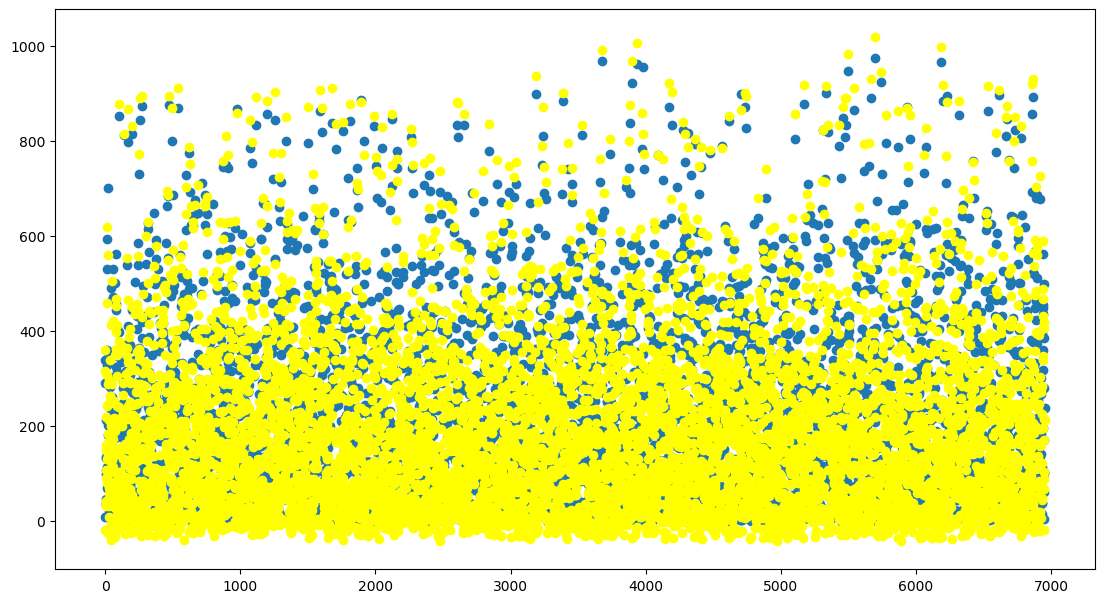

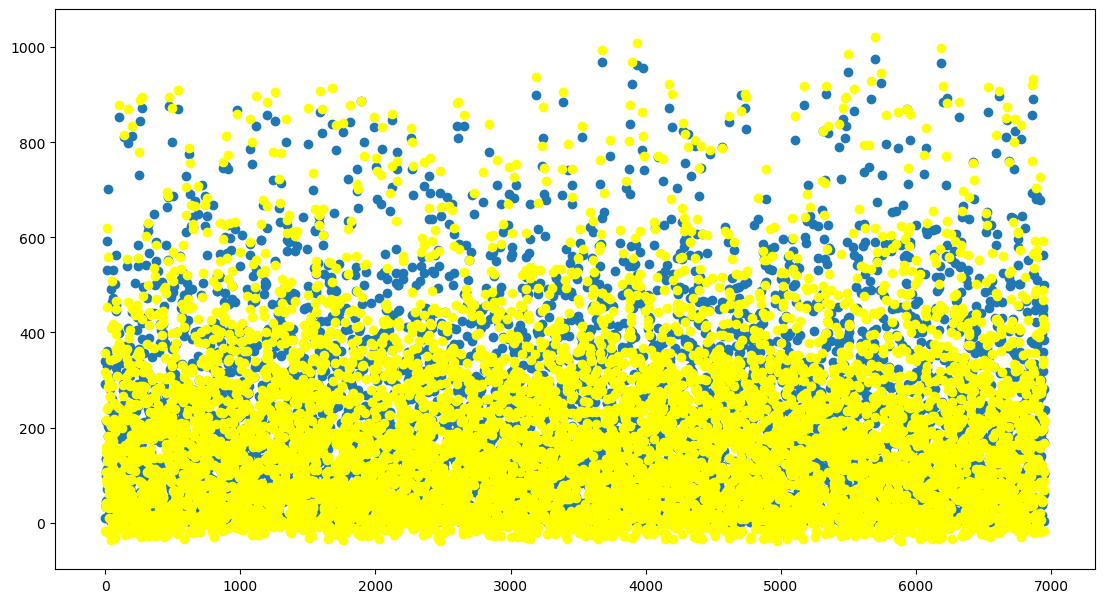

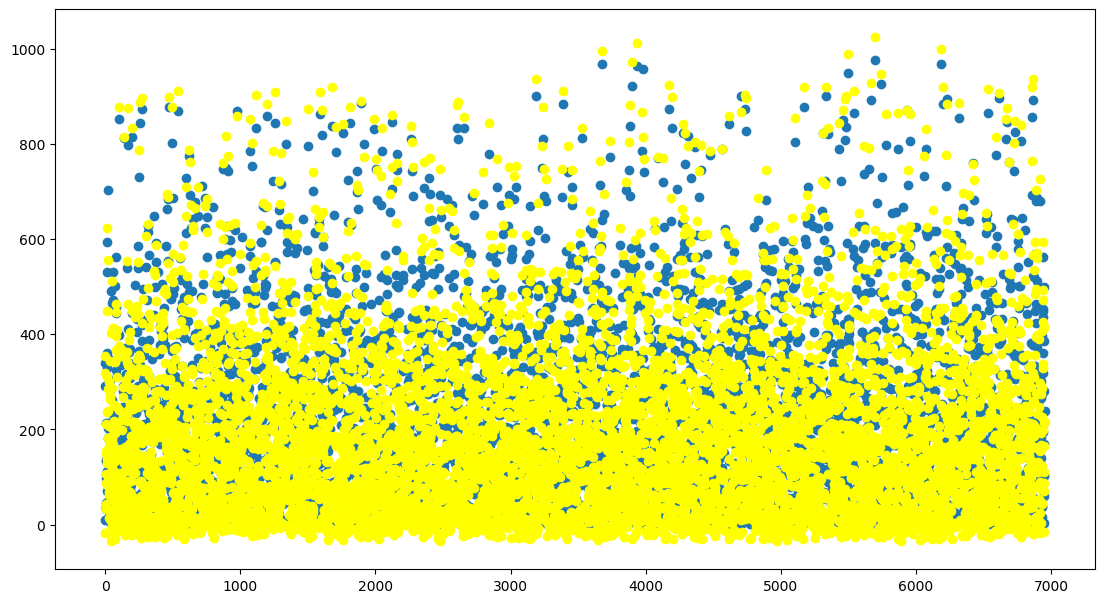

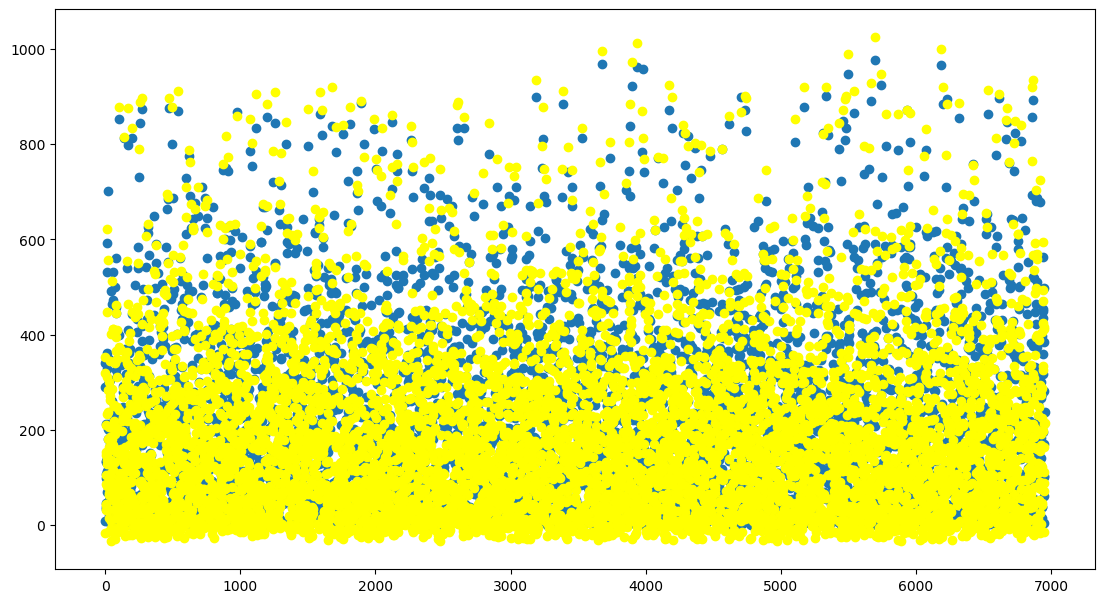

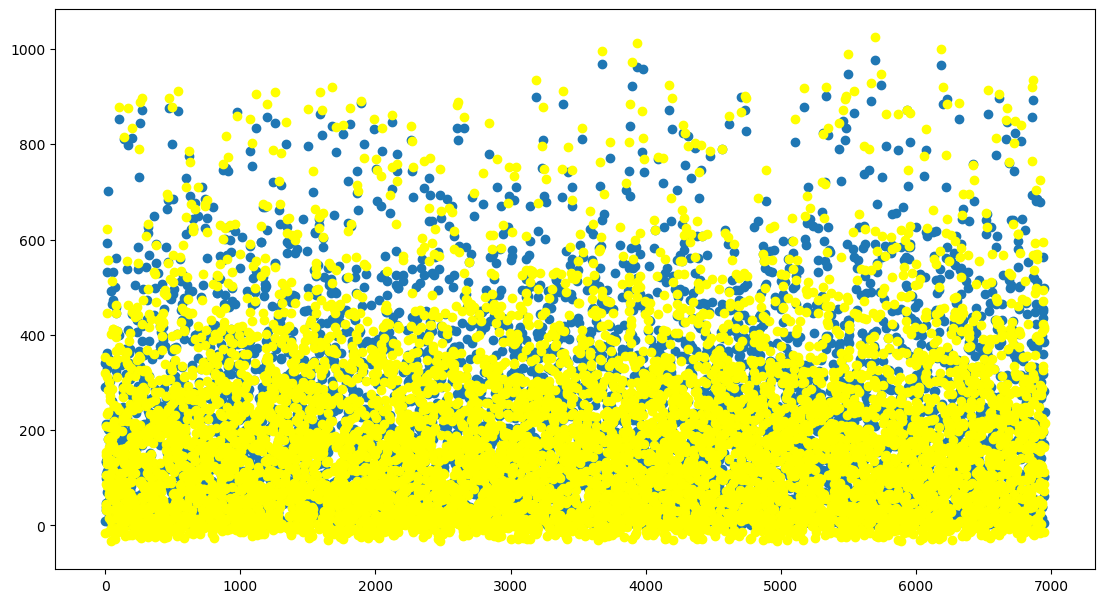

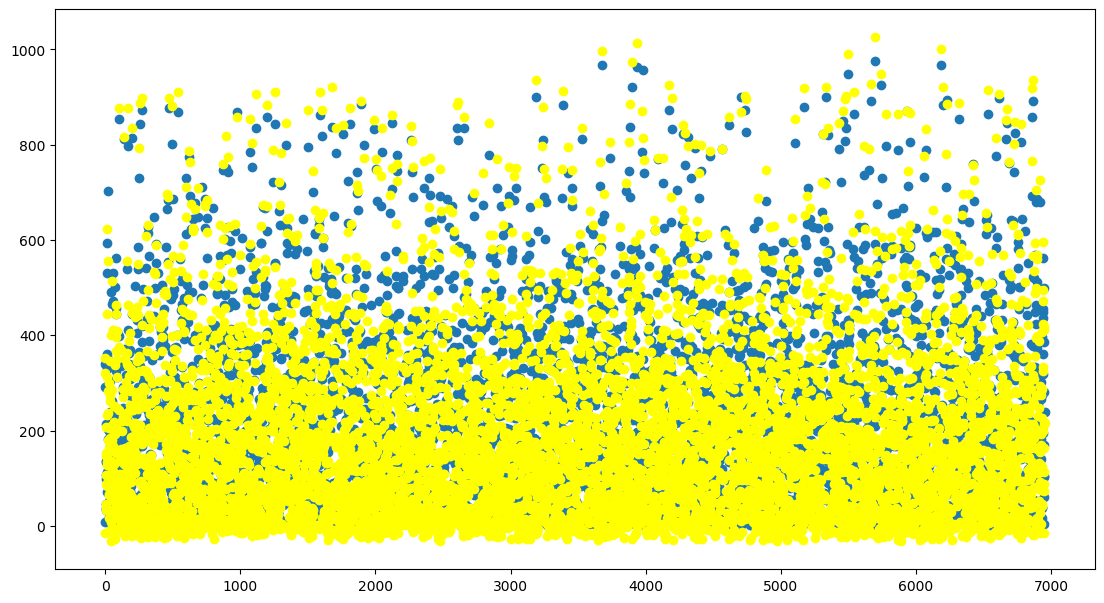

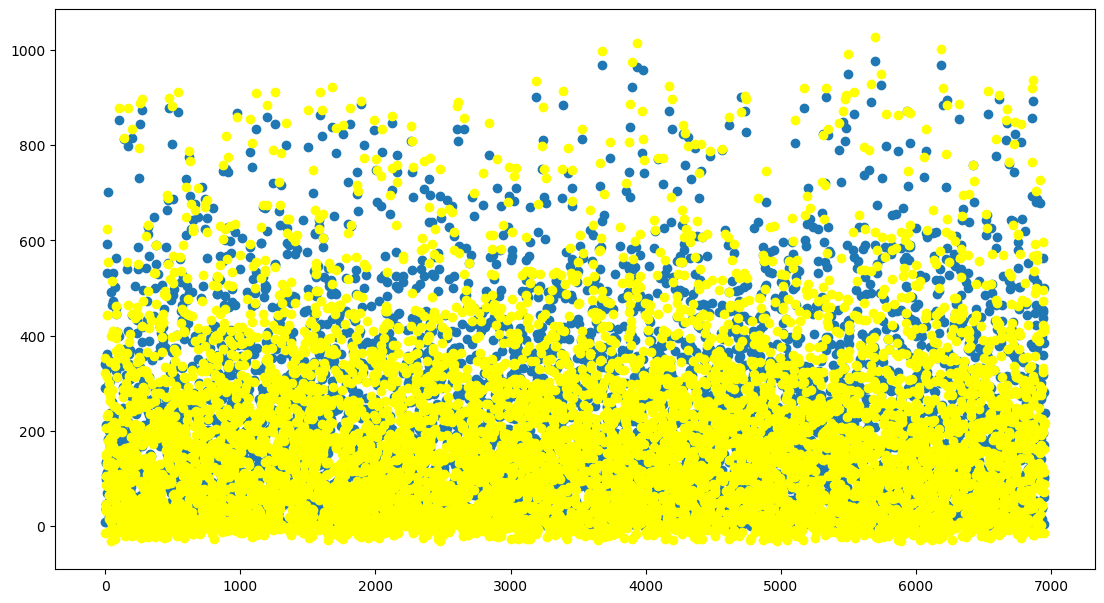

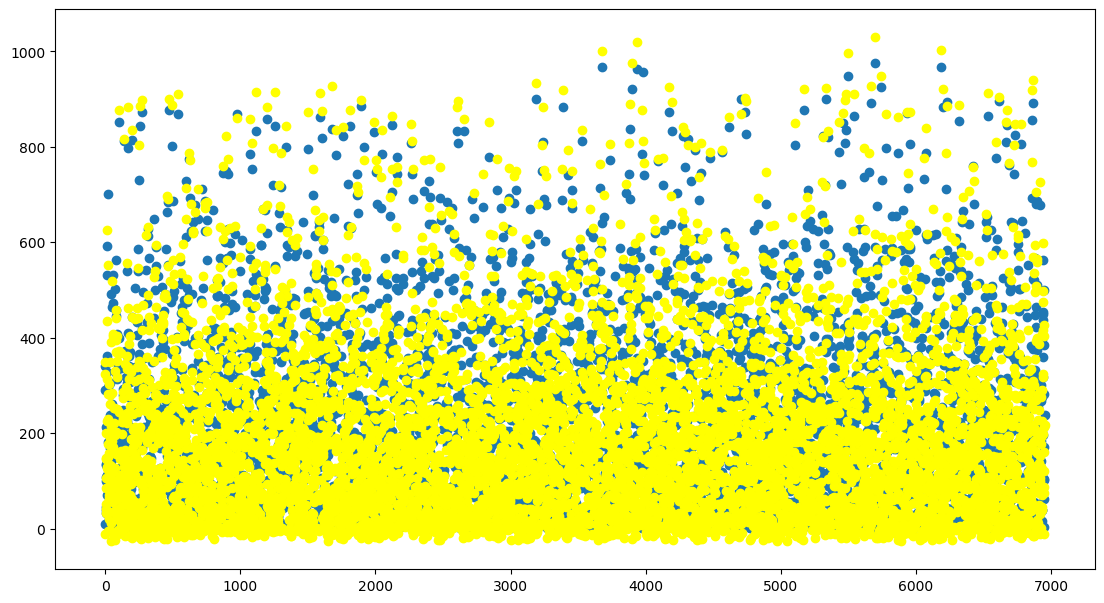

In [356]:
l = [0, 10,50,120,145,150,175,200,400]
p = np.arange(0,6952,1)
for i in range(len(l)):
    y,c = PolynomialRegression_Regularized(l[i])
    print("Condition Number = "+str(c))

    e = abs(np.array(y)-np.array(t_test))
    print("Absolute_Error",e.sum(),"\nLamda_value",l[i],"\nR2_Score",r2_score(t_test,y),"\n")
    fig = plt.figure(figsize = (13,7),dpi =100)
    axes = fig.add_axes([1,0.1,0.8,0.8])
    axes.scatter(p,t_test)
    axes.scatter(p,y,color ='yellow')

In [337]:
from sklearn import metrics
import pylab
import scipy.stats as stats

#Choosing LAMBDA = 120

y,c = PolynomialRegression_Regularized(120)
print("Condition Number = "+str(c))
e = abs(np.array(y)-np.array(t_test))
print("Absolute_Error",e.sum(),"\nLamda_value",l[i],"\nR2_Score",r2_score(t_test,y),"\n")


[3.7353229182456964, 0.2512328663905999, 0.8412318645023326, -5.642805501527078, -34.36748263348045, 1.64854841050981, 70.83926962064383, -24.097020199343675, 13.55521314441105, 1.129230434232674]
Condition Number = 1420965.6375298258
Absolute_Error 153862.20197592577 
Lamda_value 400 
R2_Score 0.9648699181153494 



In [338]:
#MEAN SQUARED ERROR

metrics.mean_squared_error(t_test,y)

1155.9008955228812

In [339]:
#MEDIAN SQUARED ERROR

metrics.median_absolute_error(t_test,y)

15.436259210259827

((array([-3.71977607, -3.48945422, -3.36275798, ...,  3.36275798,
          3.48945422,  3.71977607]),
  array([ -26.35168521,  -26.2340296 ,  -25.96227394, ..., 1003.43691197,
         1018.80829981, 1029.16748935])),
 (167.6347922648931, 188.22348629338637, 0.9374011342865406))

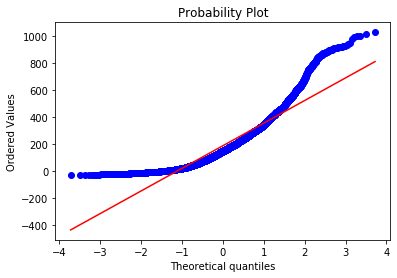

In [355]:
#Q-Q PLOT
stats.probplot(y,dist='norm', plot = pylab)

## After plotting the above values of condition number, Lamda, Error and R2-Score we can observe that the error is least for the value Lamda = 120 and then starts increasing again. Hence we Choose the MAP method over the MLE  @ Lambda = 120 as the error is least for this value.